# Microtransducers - Study of Piezoelectric Actuators
*Alexis Draussin and Antoine Richard - Université de Franche-Comté - Master ISC/SIS 1st year - March 2023*

This notebook can be read fully compiled at [https://nbviewer.org/github/eqkter/utransducers-piezoelectric-acuators/blob/master/utr.ipynb](https://nbviewer.org/github/eqkter/utransducers-piezoelectric-acuators/blob/master/utr.ipynb)

## Introduction
This lab session of Microtransducers is about understanding the design of piezoelectric actuators and estimating basic properties of bimorph actuators. We focus here on a 2-layers piezoelectric actuator that allows to measure a displacement knowing the physical propreties of the ceramics and the apply voltage. Here we measure precisely the displacement with an optical sensor: a laser is beaming through the actuator before hitting a photosensoring cell, resulting on a voltage proportional to the displacement.

## Theory
To induce a displacement of the piezoelectric actuator, two types of connection are possible: in series or in parallel. This induces two different resulting displacements:

* Series: $ \Delta x = \dfrac{2L^2 V d_{31}}{T^2} $ <br><br>
* Parallel: $ \Delta x = \dfrac{4L^2 V d_{31}}{T^2} $
  
 With $V$ the apply voltage, $L = 63.5$ mm the length of the bimorph material and $T = 510$ µm its thickness, and $d_{31} = -190$ pm/V the piezoelectric strain coefficient from the piezoelectric tensor $d_{ij}$ ( $ i \in [\![ 1;3 ]\!] \;;\; j \in [\![1;6]\!]$ ).
 
 The parameters $L$, $T$, and $d_{31}$ are defined by the denomination of the actuator: T220-A4-503, inducing the used ceramic material (and hence its electromechanical propreties) and its dimensions. We compute here for both coulping (series and parallel) the resulting displacement for an apply voltage of 24 V.

In [1]:
# Displacement for 24V - T220-A4-503
V = 24 # V
d31 = -190e-12 # m/V, A4 correponds to PSI-5A4E ceramic
T = 510e-6 # thickness for T220
L = 63.5e-3 # length for 503 size area
x_series = 2 * L**2 * V * d31 / T**2
x_parallel = 2 * x_series

print("x_series = {:3.0f} µm".format(x_series*1e6), "\nx_parallel = {:3.0f} µm".format(x_parallel*1e6))

x_series = -141 µm 
x_parallel = -283 µm


## Measurements of displacement
Given a set of measures of calibration, we now want to plot the characteristic of the photonic sensors: displacement vs measured voltage. This will give us a translation from an applied votage and the actuator displacement.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Calibration
V_cal = np.array([-9.06, -8.28, -7.34, -5.93, -5, -4.06, -3.125, -2.18, -1.09, 0, 1.4, 2.81, 3.9, 5.15, 7.96, 9.37, 10])
X_cal = np.arange(11.35, 12.16, 0.05) # mm
X_cal = X_cal - 11.8 # offset: at X=0 -> V=0

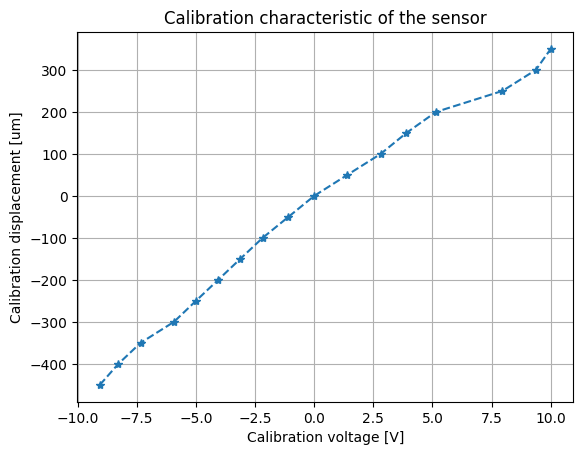

In [4]:
# Calibration plot
plt.plot(V_cal, X_cal*1e3, "--*")
plt.xlabel("Calibration voltage [V]")
plt.ylabel("Calibration displacement [um]")
plt.title("Calibration characteristic of the sensor")
plt.grid()

## Measurements of the parameter $d_{31}$
The previous calibration characterization results in a discrete function. To use it efficiently, we first want to create a continuous function to convert a measured voltage to the actuator displacement. For that we **interpolate** the previous calibration with a cubic polynomial approximation.

From there, we can translate a set of applied voltage (resulting in measured voltage of the photonic sensor) into the actuator displacement.

In [5]:
from scipy.interpolate import interp1d

# Interpolation
dX_f = interp1d(V_cal, X_cal*1e-3, 'cubic') # in meters

In [6]:
# Measurements
V_apply = np.arange(-25, 26, 5)
V_mes = np.array([3.438, 3.156, 2.594, 2.062, 1.047, 0, -0.484, -1.172, -1.594, -2.219, -2.781])

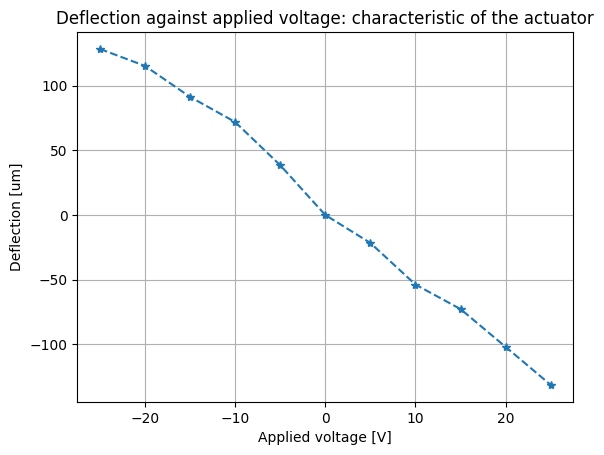

In [7]:
# Plot
plt.plot(V_apply, dX_f(V_mes)*1e6, "--*")
plt.xlabel("Applied voltage [V]")
plt.ylabel("Deflection [um]")
plt.title("Deflection against applied voltage: characteristic of the actuator")
plt.grid()

This curve can then be use to compute the parameter $d_{31}$ from the first equation; as we are in a series connection:
$$ \Delta x = \dfrac{2L^2Vd_{31}}{T^2} \quad\Rightarrow\quad d_{31} = \dfrac{\Delta x}{V} \dfrac{T^2}{2L^2}$$

To obtain the best approximation, we suppose here that the previous curve is a linear relation thus the mean of the ratio $\Delta x/V$ is compute by the sensibility of the entire system:
$$ \Delta x \approx \alpha V + \beta \quad\Rightarrow\quad \dfrac{\Delta x}{V} \approx \sigma = \dfrac{\mathrm{d}\, \left(\Delta x\right)}{\mathrm{d}\, V} = \alpha $$

Hence using a linear fit on the displacement vs the applied voltage, we can thus compute a good approximation of the $\Delta x / V$ ratio allowing the $d_{31}$ calculation.

In [8]:
from scipy.optimize import curve_fit

def model_f(x, a, b):
    return a*x+b

coeff, _ = curve_fit(model_f, V_apply, dX_f(V_mes))
d31 = coeff[0] * T**2 / (2 * L**2) # reverse the first equation

print("d31_exp = {:3.0f} pm/V".format(d31*1e12), "\nd31_th = -190 pm/V") # d31_th = -190e-12

d31_exp = -174 pm/V 
d31_th = -190 pm/V


## Actuators using bimorphs
### Protocol to identify an unkown bimorph actuator

* Measure its dimensions;
* Check the material;
* Test its thermal response;
* Test its piezoelectric response;
* Test its frequency response.

With those characterizations we can compute some parameters like the previous coefficient $d_{31}$, the resonance frequency or the electromechanical coupling. Then compare those values to datasheets of known actuators to identify the structure.

### Applications

Some applications for bimorph actuators could be:
1. Sensors (displacement or voltage);
2. Micro-grippers (precise displacement under a certain voltage);
3. Haptic feedback (reflect a displacement with an output voltage that can be applied to an haptic motor interface).

### Act on the resonance frequency

To reduce the resonance frequency of this bimorph structure, we can change the following parameters:
* Dimensions: length and width (proportional);
* Third dimension: thickness (anti-proportional);
* Material itslef: the mass depends on the composition (anti-proportional)

### Act on the deflection

To increase the deflection of this bimorph structure, we can do the following:
* Increase the applied voltage;
* Optimize the dimensions: larger length and smaller thickness;
* Materiel itslef: a smaller mass for the same dimensions;
* Couple multiple actuators in series: the resulting displacements add up to the final value.

Applying this to the T215-H4-303X actuator, we see that the thickness is already miminal and the $d_{31}$ coefficient of the ceramic PSI-5H4E is better than the one we get from the previously studied PSI-5A4E material. All that we can upgrade to increase the displacement is to enlarge its surface area from 303 (31.8 mm x 12.7 mm) to 503 (63.5 mm x 31.8 mm).

## Conclusion
This (short) lab was an overview of how we can understand complex actuators, here bimorph materials, just looking at specifications and via a set of measurements. Though we were not able to perform the practical work (leading to the resonant frequency and the electromechanical coupling), the theoritical analysis allowed us to find a physical parameter ($d_{31}$) of the material just by exploiting a set of measures: first the characterization of the photonic sensor linking the output voltage to the actuator displacement, then the characterization of the output voltage against the applied voltage. To retreive the actual displacement resulting of the applied voltage, we had to link those two characterizations via interpolation, and in the end we could retreive a good value for $d_{31}$. This work made us more aware of the metes and bounds of this course, its possible applications and studies: bimorph materials and piezoelectricity are currently a large field of research in material physics.